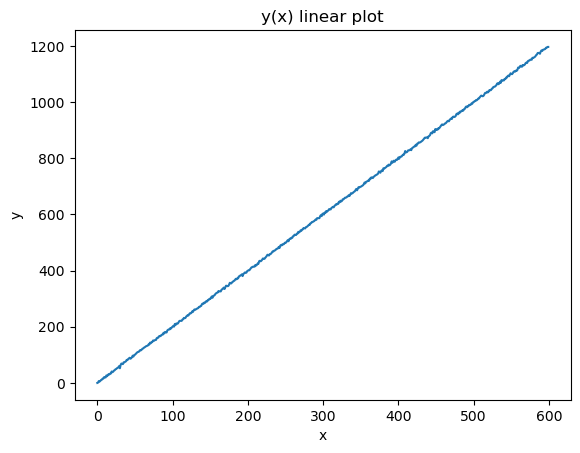

m:	-534492825275539.06
c:	-1337349318715.477
m should be	2
c should be	0


In [78]:
"""
trying to do this without cuda first coz ehhhh
"""
import numpy as np
from matplotlib import pyplot as plt
import math

M_INITIAL_GUESS = 0
C_INITIAL_GUESS = 0
MAX_ITERATIONS = 100
LEARNING_RATE = 10**-5

# it returns [m, c]
def minimizeMeanSquaredError(x, y, printlog = True):
    m = M_INITIAL_GUESS
    c = C_INITIAL_GUESS
    lr = LEARNING_RATE
    step = 0
    while step < MAX_ITERATIONS:
        dEdm = _getdEdm(x, y, m, c)
        dEdc = _getdEdc(x, y, m, c)
        m -= lr * dEdm
        c -= lr * dEdc
        if printlog:
            E = _getE(x, y, m, c)
            print(f"step: {step}\tE: {E}\tm: {m}\tc: {c}")
        step += 1
    return [m, c]

def _getE(x, y, m, c):
    s = 0
    for i in range(len(x)):
        s += (y[i] - m*x[i] - c)**2
    return s / float(len(x))

def _getdEdm(x, y, m, c):
    s = 0
    for i in range(len(x)):
        s += x[i] * (y[i] - m*x[i] - c)
    return - 2 * s / float(len(x))

def _getdEdc(x, y, m, c):
    s = 0
    for i in range(len(x)):
        s += y[i] - m*x[i] - c
    return - 2 * s / float(len(x))


def plot(x, y):
    plt.title("y(x) linear plot") 
    plt.xlabel("x") 
    plt.ylabel("y") 
    plt.plot(x, y) 
    plt.show()

    
XMIN = 0
XMAX = 600
CORROLATION = 2
SHIFT = 0
NOISE_MU = 0
NOISE_SD = 2
    
# make some crap linearly correlated data
x = np.zeros(XMAX - XMIN)
y = np.zeros(XMAX - XMIN)
for i in range(XMIN, XMAX):
    x[i] = i
    y[i] = (i * CORROLATION) + SHIFT + np.random.normal(NOISE_MU, NOISE_SD)
plot(x, y)
[m, c] = minimizeMeanSquaredError(x, y, False)
print(f"m:\t{m}\nc:\t{c}")
print(f"m should be\t{CORROLATION}\nc should be\t{SHIFT}")